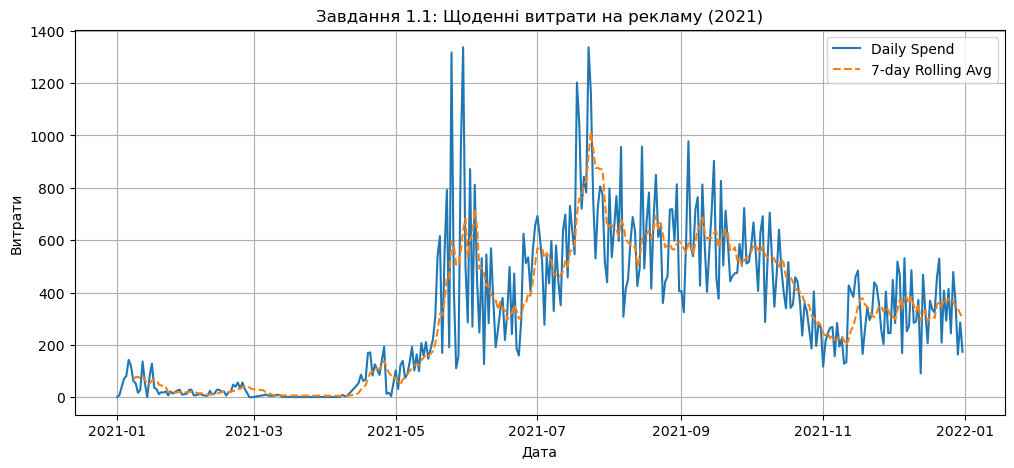

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Завантаження даних
df = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\facebook_ads_data.csv")
df['ad_date'] = pd.to_datetime(df['ad_date'])


#1. Групування по днях у 2021 та побудова графіків витрат і ROMI
df_2021 = df[df['ad_date'].dt.year == 2021]
daily_grouped = df_2021.groupby('ad_date').agg({'total_spend': 'sum','romi': 'mean'}).reset_index()
daily_grouped['spend_rolling'] = daily_grouped['total_spend'].rolling(window=7).mean()
daily_grouped['romi_rolling'] = daily_grouped['romi'].rolling(window=7).mean()

# 1.1 Графік витрат
plt.figure(figsize=(12, 5))
plt.plot(daily_grouped['ad_date'], daily_grouped['total_spend'], label='Daily Spend')
plt.plot(daily_grouped['ad_date'], daily_grouped['spend_rolling'], label='7-day Rolling Avg', linestyle='--')
plt.title("Завдання 1.1: Щоденні витрати на рекламу (2021)")
plt.xlabel("Дата")
plt.ylabel("Витрати")
plt.legend()
plt.grid(True)
plt.show()


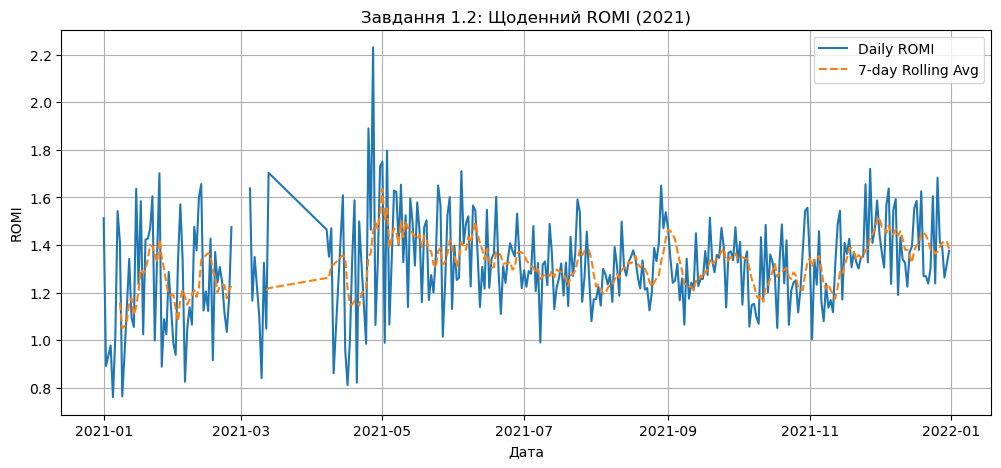

In [3]:
# 1.2 Графік ROMI
plt.figure(figsize=(12, 5))
plt.plot(daily_grouped['ad_date'], daily_grouped['romi'], label='Daily ROMI')
plt.plot(daily_grouped['ad_date'], daily_grouped['romi_rolling'], label='7-day Rolling Avg', linestyle='--')
plt.title("Завдання 1.2: Щоденний ROMI (2021)")
plt.xlabel("Дата")
plt.ylabel("ROMI")
plt.legend()
plt.grid(True)
plt.show()

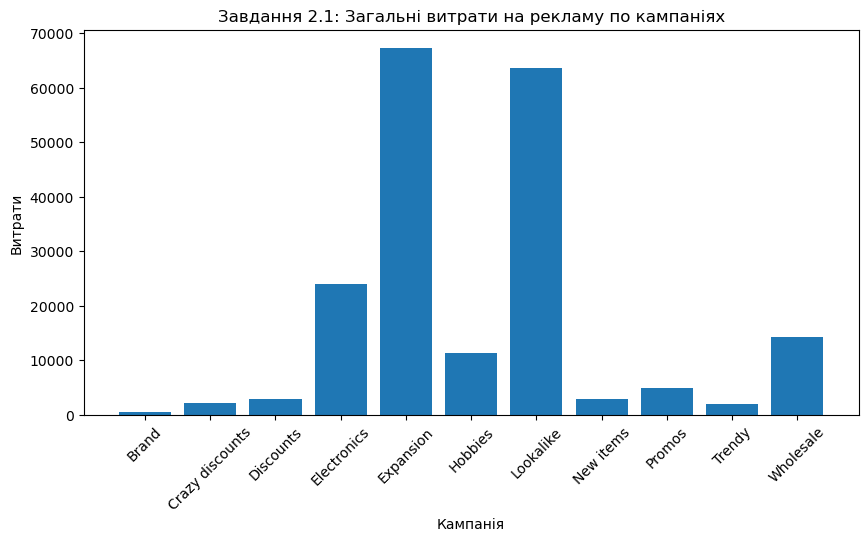

In [5]:
# 2. Групування по кампаніях: витрати і ROMI
campaign_grouped = df.groupby('campaign_name').agg({'total_spend': 'sum', 'total_value': 'sum'}).reset_index()
campaign_grouped['romi'] = campaign_grouped['total_value'] / campaign_grouped['total_spend']

# 2.1 Графік витрат по кампаніях
plt.figure(figsize=(10, 5))
plt.bar(campaign_grouped['campaign_name'], campaign_grouped['total_spend'])
plt.title("Завдання 2.1: Загальні витрати на рекламу по кампаніях")
plt.xlabel("Кампанія")
plt.ylabel("Витрати")
plt.xticks(rotation=45)
plt.show()

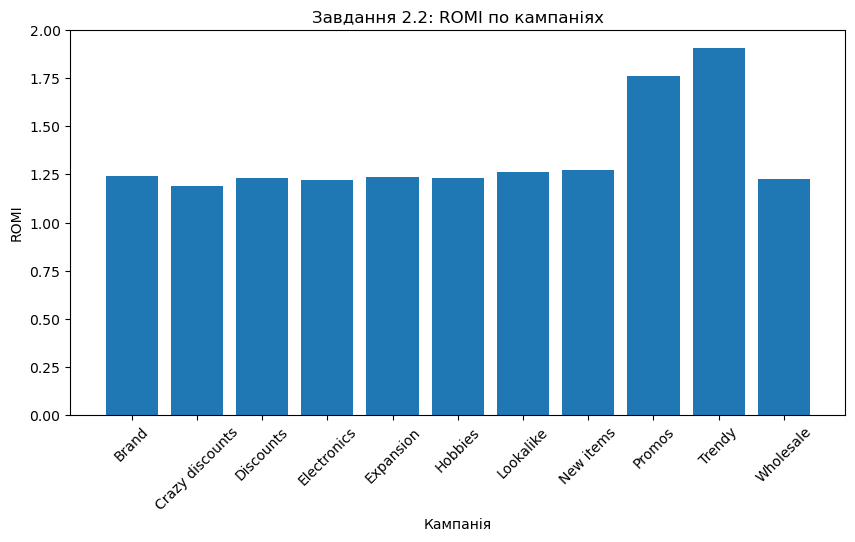

In [6]:
# 2.2 Графік ROMI по кампаніях
plt.figure(figsize=(10, 5))
plt.bar(campaign_grouped['campaign_name'], campaign_grouped['romi'])
plt.title("Завдання 2.2: ROMI по кампаніях")
plt.xlabel("Кампанія")
plt.ylabel("ROMI")
plt.xticks(rotation=45)
plt.show()

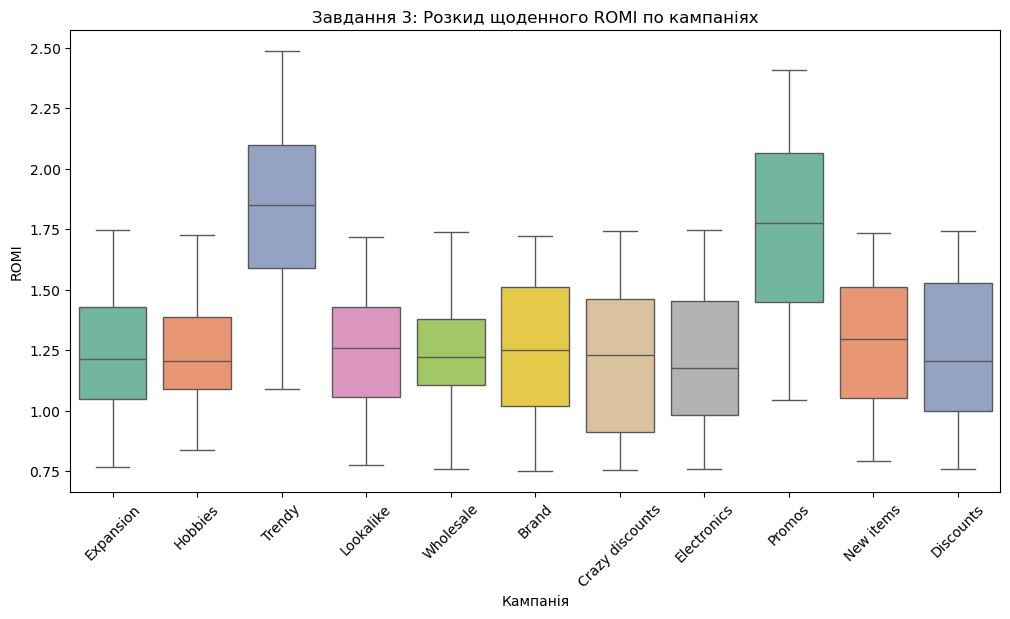

In [9]:
# 3. Box plot щоденного ROMI по кампаніях
romi_data = df.dropna(subset=['romi'])
plt.figure(figsize=(12, 6))
sns.boxplot(data=romi_data, x='campaign_name', y='romi', hue='campaign_name', palette='Set2')
plt.title("Завдання 3: Розкид щоденного ROMI по кампаніях")
plt.xlabel("Кампанія")
plt.ylabel("ROMI")
plt.xticks(rotation=45)
plt.show()

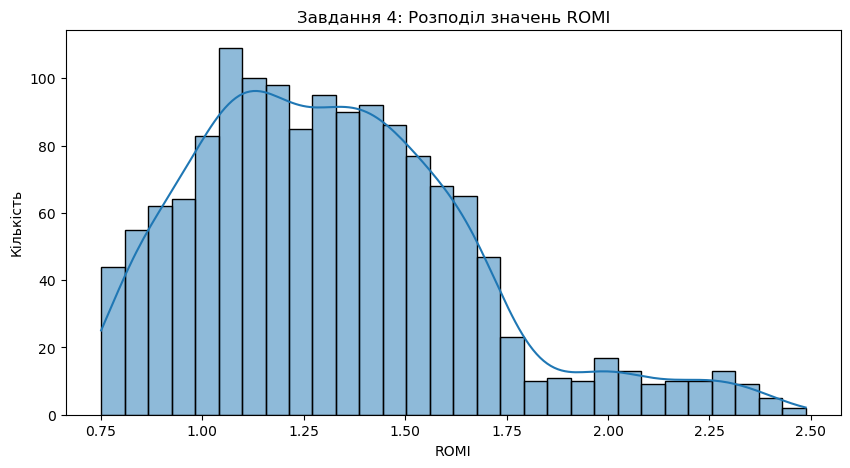

In [10]:
#4. Гістограма розподілу значень ROMI
plt.figure(figsize=(10, 5))
sns.histplot(data=romi_data, x='romi', bins=30, kde=True)
plt.title("Завдання 4: Розподіл значень ROMI")
plt.xlabel("ROMI")
plt.ylabel("Кількість")
plt.show()

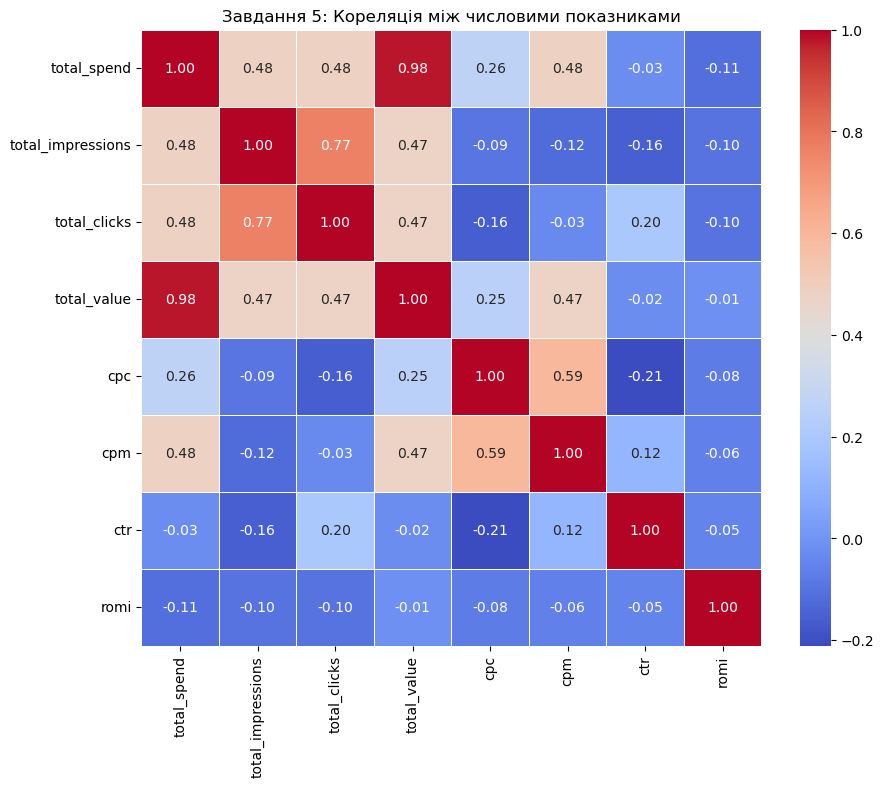

In [11]:
#5. Теплова карта кореляції
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Завдання 5: Кореляція між числовими показниками")
plt.show()

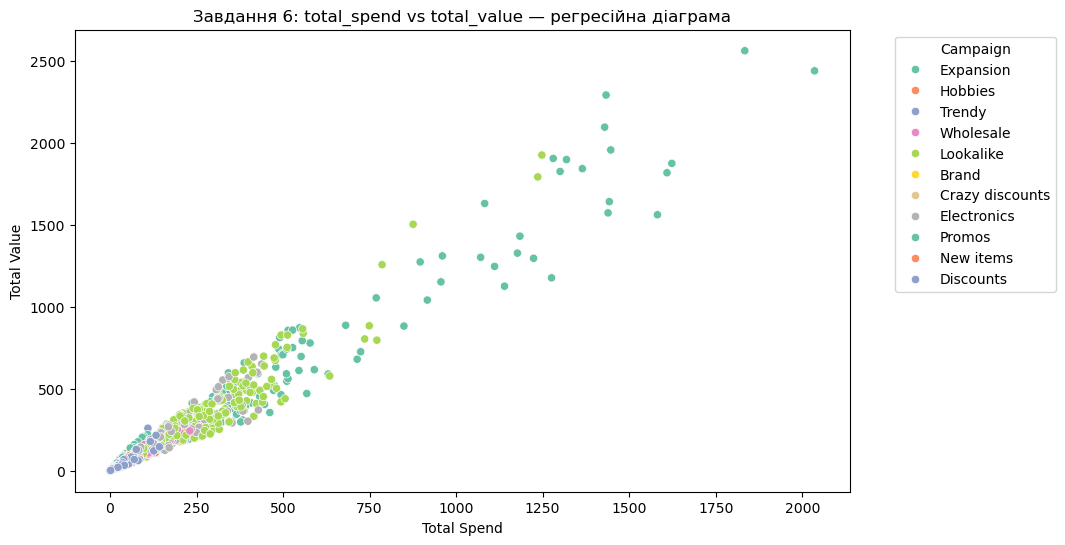

In [14]:
#6. Точкова діаграма з лінійною регресією
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_spend', y='total_value', hue='campaign_name', palette='Set2')
plt.xlabel("Total Spend")
plt.ylabel("Total Value")
plt.legend(title='Campaign', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Завдання 6: total_spend vs total_value — регресійна діаграма")
plt.show()